In [1]:
# LSST package for TAP queries
from lsst.rsp import get_tap_service
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Get an instance of the SSO TAP service, and assert that it exists.

In [2]:
service = get_tap_service("ssotap")
assert service is not None

Build my query for the database. I want only MBAs so I am making some cuts on orbit. Note there is currently no a column in the table, so I am calculating it on the fly. Note there could be hyperbolic orbits (which are a different population of small bodies) so I am cutting them out by first removing e >=1 things in the query. For this notebook I picked 1.6 <= a <=4.2 au  and q >=1.3 au for the semimajor axis/perihelion constraints for the main belt. 

In [3]:
cmd ='''
select MPCORB.ssObjectId, q,e,incl,nobs 
from dp03_catalogs_10yr.MPCORB as MPCORB   
JOIN dp03_catalogs_10yr.SSObject as SSObject
ON MPCORB.ssObjectId = SSObject.ssObjectId 
where (e <1) and (q/(1-e) >= 1.6) and (q/(1-e) <= 4.2 and q>=1.3) 
'''


Let's do the query and also add in a semimajor axis column

In [4]:
lsst_discovery_orbits =service.search(cmd)
lsst_discovery_orbits=lsst_discovery_orbits.to_table().to_pandas()
lsst_discovery_orbits.insert(2, "a", lsst_discovery_orbits["q"]/(1-lsst_discovery_orbits["e"]), True) 

Let's see how many objects have been reported

In [5]:
lsst_discovery_orbits.shape[0]

4279370

Let's do the same thing for all orbits in the MPC

In [6]:
cmd ='''
select MPCORB.ssObjectId, q,e,incl,nobs 
from dp03_catalogs_10yr.MPCORB as MPCORB    
where (e <1) and (q/(1-e) >= 1.6) and (q/(1-e) <= 4.2 and q>=1.3)
'''

mpc_orbits =service.search(cmd)
mpc_orbits=mpc_orbits.to_table().to_pandas()
mpc_orbits.insert(2, "a", mpc_orbits["q"]/(1-mpc_orbits["e"]), True) 
mpc_orbits.shape[0]


13880256

In [7]:
lsst_discovery_orbits

,ssObjectId,q,a,e,incl,nobs
0,-8913159981519932845,2.634824,2.939494,0.103647,2.25617,0
1,6203778644188667635,2.063750,2.317805,0.109610,1.55987,0
2,-3002051867512054290,2.647201,3.098714,0.145710,0.72745,0
3,2844359012889597252,2.456224,2.572468,0.045188,6.90619,0
4,-8365056588950409896,2.312656,2.991539,0.226934,8.37026,0
...,...,...,...,...,...,...
4279365,-4660758173474381765,1.458540,2.397553,0.391655,19.67068,0
4279366,739991862214566273,1.447770,2.413749,0.400198,19.87525,0
4279367,-2298811822208104827,1.434899,2.601719,0.448481,6.97697,0
4279368,-5156463352471898495,1.413994,3.240910,0.563705,20.48926,0


Plot the a/e distributions for the LSST discovered MBAs. We should be able to see the Kirkwood gaps

Text(0, 0.5, 'inclination (degrees)')

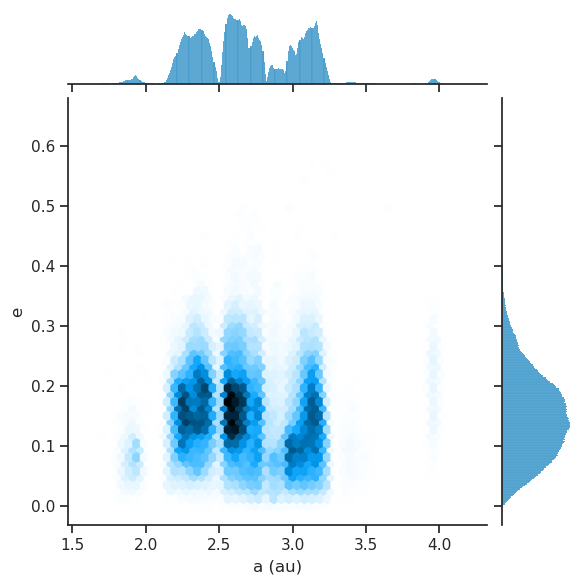

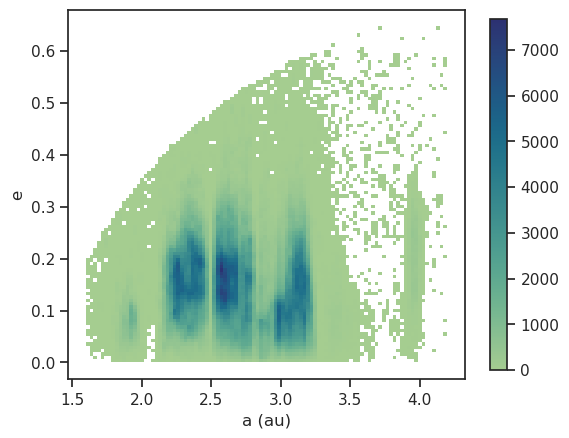

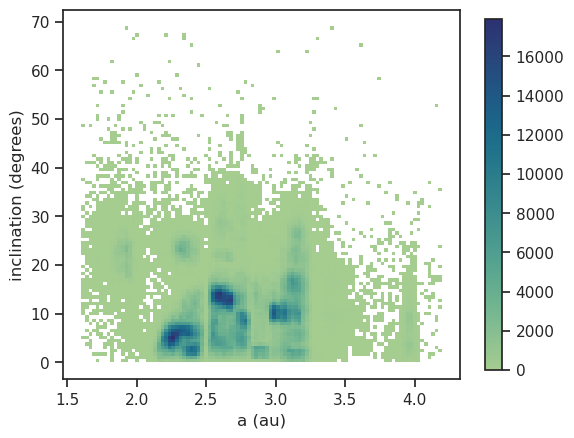

In [8]:
sns.set(style="ticks")
tmp=lsst_discovery_orbits
sns.jointplot(x=tmp['a'], y=tmp['e'], kind="hex", color="#0077BB", gridsize=50)

plt.xlabel('a (au)')

plt.figure()
sns.histplot(x=tmp['a'], y=tmp['e'], bins=100, cmap="crest",  cbar=True, cbar_kws=dict(shrink=.95))
plt.xlabel('a (au)')

plt.figure()

sns.histplot(x=tmp['a'], y=tmp['incl'], bins=100, cmap="crest",  cbar=True, cbar_kws=dict(shrink=.95))
plt.xlabel('a (au)')
plt.ylabel('inclination (degrees)')

Let's do the same thing for the MPC distribution

Text(0, 0.5, 'inclination (degrees)')

<Figure size 640x480 with 0 Axes>

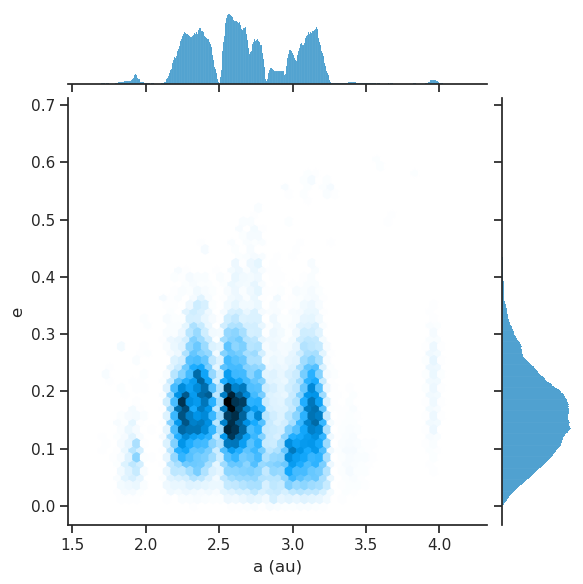

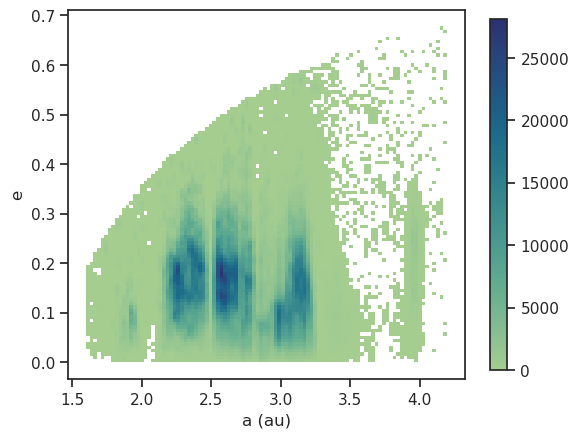

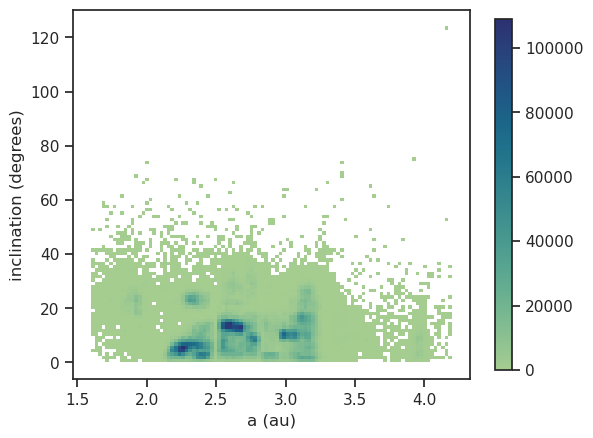

In [13]:
sns.set(style="ticks")
plt.figure()
tmp=mpc_orbits
sns.jointplot(x=tmp['a'], y=tmp['e'], kind="hex", color="#0077BB", gridsize=50)
plt.xlabel('a (au)')

plt.figure()

sns.histplot(x=tmp['a'], y=tmp['e'], bins=100, cmap="crest",  cbar=True, cbar_kws=dict(shrink=.95))
plt.xlabel('a (au)')

plt.figure()

sns.histplot(x=tmp['a'], y=tmp['incl'], bins=100, cmap="crest",  cbar=True, cbar_kws=dict(shrink=.95))
plt.xlabel('a (au)')
plt.ylabel('inclination (degrees)')

Looks like there is a retrograde objects in the MPC distribution. Let's focus on lower inclination things than that

Text(0, 0.5, 'inclination (degrees)')

<Figure size 640x480 with 0 Axes>

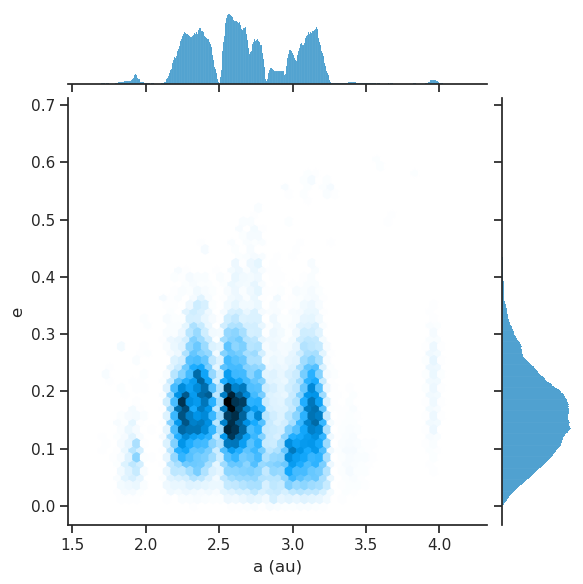

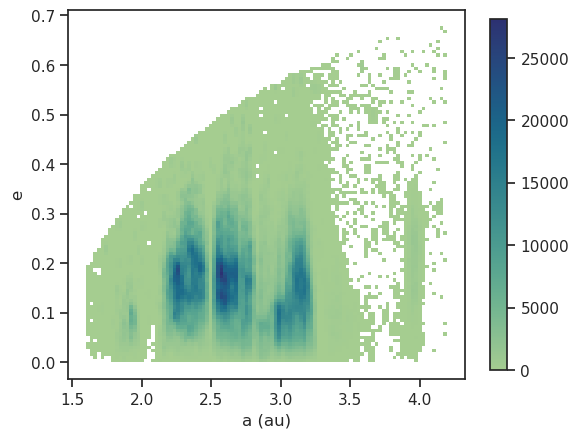

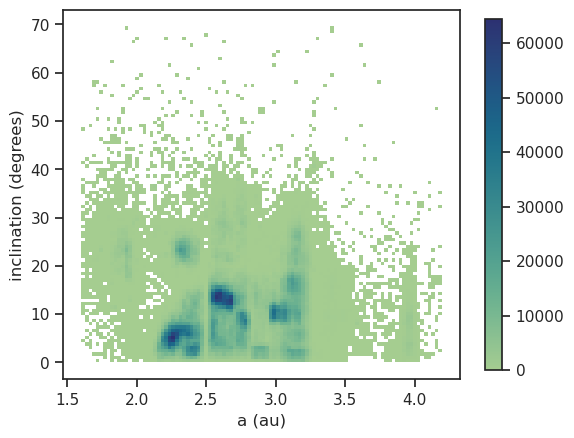

In [19]:
sns.set(style="ticks")
plt.figure()
tmp=mpc_orbits[(mpc_orbits['incl']<70)]
sns.jointplot(x=tmp['a'], y=tmp['e'], kind="hex", color="#0077BB", gridsize=50)
plt.xlabel('a (au)')

plt.figure()

sns.histplot(x=tmp['a'], y=tmp['e'], bins=100, cmap="crest",  cbar=True, cbar_kws=dict(shrink=.95))
plt.xlabel('a (au)')

plt.figure()

sns.histplot(x=tmp['a'], y=tmp['incl'], bins=100, cmap="crest",  cbar=True, cbar_kws=dict(shrink=.95))
plt.xlabel('a (au)')
plt.ylabel('inclination (degrees)')